### Лабораторная работа 3. Анимация с помощью функции FuncAnimation. Движение секущей прямой к заданной прямой

Вычислительная практика 2. ММФ. 5 группа
Бельская Екатерина. апрель 2020

In [1]:
import numpy as np

In [2]:
import math as mth

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib nbagg

Для построения аниамации будем использовать модуль **animation** библиотеки **matplotlib**

In [5]:
import matplotlib.animation as anim

Непосредственно анимацию построим с помощью функции **FuncAnimation**

FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, \*, cache_frame_data=True, \**kwargs)

Функция FuncAnimate имеет два обязательных аргумента fig и func.

fig -- графическое окно, в котором будет отображаться анимация.

func -- функция одного аргумента, которая будет вызываться в каждом кадре.

In [6]:
help(anim.FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)
 |  
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  Parameters
 |  ----------
 |  fig : matplotlib.figure.Figure
 |     The figure object that is used to get draw, resize, and any
 |     other needed events.
 |  
 |  func : callable
 |     The function to call at each frame.  The first argument will
 |     be the next value in *frames*.   Any additional positional
 |     arguments can be supplied via the *fargs* parameter.
 |  
 |     The required signature is::
 |  
 |        def func(frame, *fargs) -> iterable_of_artists
 |  
 |     If ``blit == True``, *func* must return an iterable of all artists
 |     that were modified or created. This information is used by the blitting
 |     algorithm to determine which parts of the figure have to be 

# Пример 1 (анимация построения линейной функции)

Построим анимацию линейной функции $y=x$ по значениям $x$, изменяющимся от $0$ до $10$ с шагом $1$.

Для начала создадим графическое окно для анимации

<IPython.core.display.Javascript object>


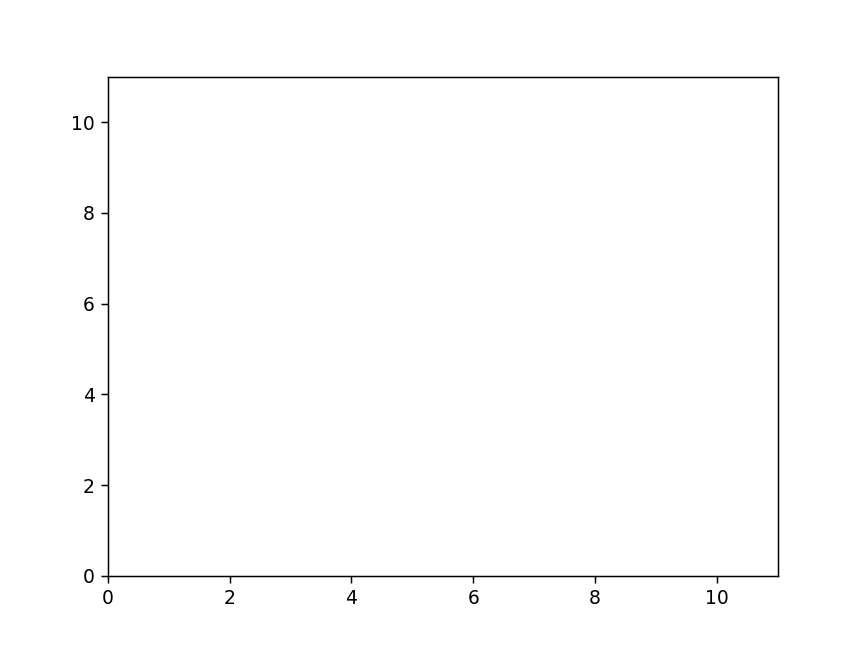

In [20]:
fig = plt.figure();

В графическом окне создадим графическую область и зададим пределы по осям

In [21]:
ax1 = plt.axes();
plt.axis([0, 11, 0, 11]);

В графической области создадим объект типа Line2D, координаты которого пока не определены

In [22]:
line, = ax1.plot([], [], 'r');

Определим функцию одного аргумента at_frame1, которая будет вызываться в каждом кадре. Аргументом функции будет номер кадра. Функция добавляет к графическому объекту line из графической области для анимации точку с координатами $(t, t)$ и возвращает изменённый графический объект line.

In [55]:
def at_frame1(t):
    """добавляет к графическому объекту line новую точку с координатами (t, t) и возвращает изменённый графический объект
    
    Arguments:
    t -- номер кадра, неотрицательное целое число
    
    Returns: графический объект типа Line2D
    """
    x_coord = list(line.get_xdata());
    y_coord = list(line.get_ydata());
    x_coord += [t];
    y_coord += [t];
    line.set_data([1], [1])


    
    return line

Строим анимацию. frames=11 означает, что всего будет 11 кадров, значения которых будут изменяться от 0 до 10. Для каждого кадра будет вызываться функция at_frame1 со значением аргумента, равным номеру кадра.

<IPython.core.display.Javascript object>


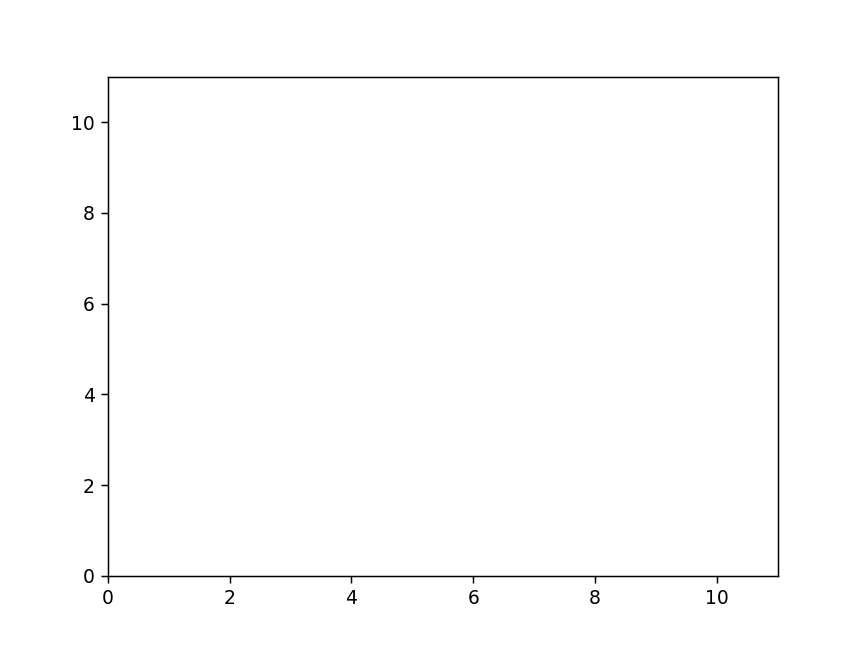

In [57]:
fig1 = plt.figure();
ax1 = plt.axes();
plt.axis([0, 11, 0, 11]);
line, = ax1.plot([1], [1], 'r');

anim.FuncAnimation(fig1, at_frame1, frames=11, repeat=False)

# Пример 2 (анимация движения тела по траектории)

В контексте постановки задачи из Лабраторной работы 1 необходимо построить анимацию движения тела по траектории  $(s_x(t),s_y(t))$  для  $t\in[0,T]$.

Определим исходные данные задачи и построим массивы для покоординатного представления траектории движения

In [12]:
h_start = 10 # высота положения тела в момент запуска
T = 2.5 # время полета
s_end = 5.5e1 # горизонтальное перемещение тела за время полета
h_end = 1.2E+1 # высота положения тела в конечный момент движения
g = 9.807 # ускорение свободного падения

v0_x = s_end/T
v0_y = (h_end-h_start+g/2*T**2)/T

t = np.arange(0,T,0.01)
s_x = v0_x*t
s_y = h_start+v0_y*t-g*t**2/2


Создадим матрицу $s$ из двух столбцов для хранения координат траектории движения

In [13]:
s = np.transpose(np.array([s_x, s_y]))

Cоздадим графическое окно для анимации. В графическом окне создадим графическую область и зададим пределы по осям. В графической области создадим два графических объекта типа Line2D, координаты которого пока не определены.


<IPython.core.display.Javascript object>


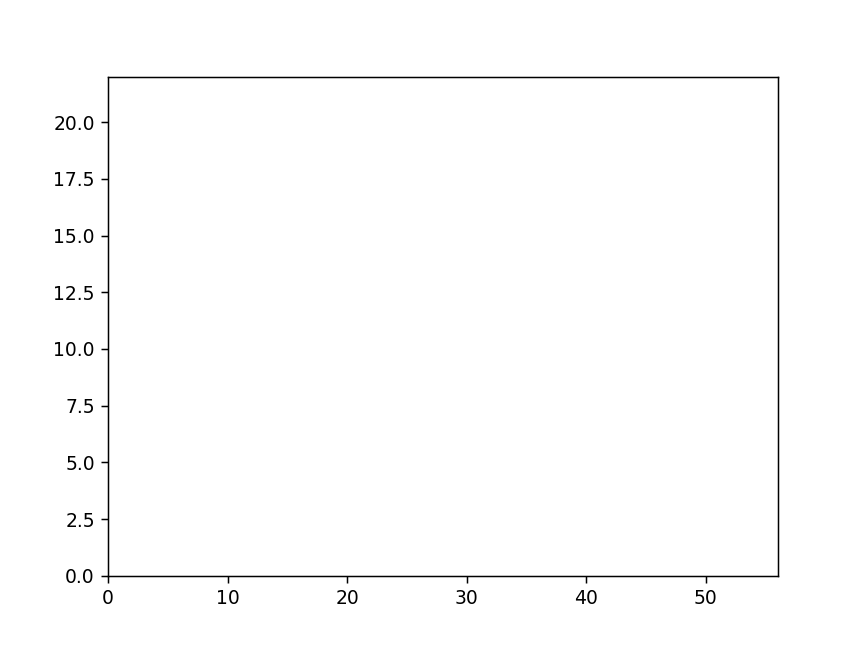

In [14]:
fig2 = plt.figure();

ax2 = plt.axes();
plt.axis([0, s_end+1, 0, h_end+10]);

line1, = ax2.plot([], [],'k');  # отображение траектории
line2, = ax2.plot([], [],'ro'); # отображение тела

In [15]:
coords = list(line1.get_data())
coords

[array([], dtype=float64), array([], dtype=float64)]

Определим функцию одного аргумента at_frame2, которая будет вызываться в каждом кадре. Аргументом функции будет массив из $x$-ой и $у$-ой кординаты точки траектории. Функция добавляет к графическому объекту line1 из графической области для анимации точку с координатами $(x,y)$. Также функция задает графический объект line2 одной точкой с текущими координатами $(x,y)$.

In [16]:
def at_frame2(t):
    """добавляет к графическому объекту line1 новую точку с координатами (t[0],t[1]) и 
    задает графичекий объект line2 точкой с координатами (t[0],t[1])
    
    Arguments:
    t -- массив из двух элементов
    
    Returns: два графических объета типа Line2D
    """
    x_coord = list(line1.get_xdata());
    y_coord = list(line1.get_ydata());
    x_coord += [t[0]];
    y_coord += [t[1]];
    line1.set_data(x_coord, y_coord)
    line2.set_data(t)
    
    return line1, line2

Строим анимацию. frames=s означает, что всего будет столько кадров, сколько строк матрицы $s$. Для каждого кадра будет вызываться функция at_frame2 со значением аргумента, равным массиву со значениями в текущей строке матрицы.

<IPython.core.display.Javascript object>


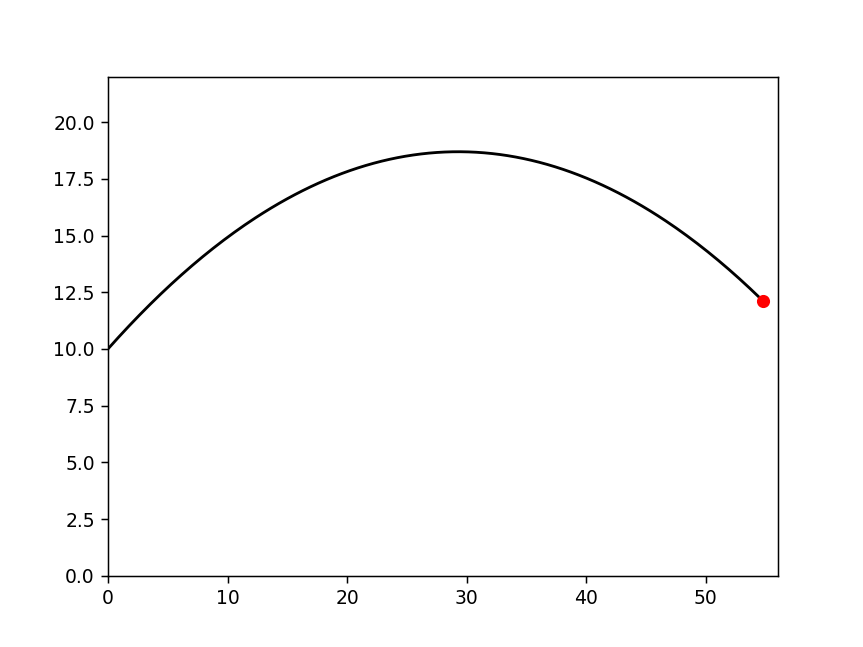

In [17]:
fig2 = plt.figure();

ax2 = plt.axes();
plt.axis([0, s_end+1, 0, h_end+10]);

line1, = ax2.plot([], [],'k');  # отображение траектории
line2, = ax2.plot([], [],'ro'); # отображение тела

anim.FuncAnimation(fig2, at_frame2, frames=s, repeat=False, interval=10)

# Задание (анимация движения секущей прямой к заданной кривой)

Кривая задана траекторией движения тела из Лабораторной работы 1 как $(sx(t),sy(t))$ для $t\in[0,T]$. Начальная точка траектории с координатами $(s_x(0),s_y(0))$ является неподвижной точкой, обозначим ее через $A$. Подвижная точка $B$ движется последовательно по кривой от конечной точки траектории $(s_x(T),s_y(T))$ к начальной точке $A$.

Необходимо построить анимацию движения секущей прямой, проходящей через точки $A$ и $B$ до момента, когда секущая прямая становится касательной прямой к заданной кривой при совпадении координат точек $A$ и $B$.

## Реализация

Перед началом анимации графическая область должна содержать следующие графические объекты:

* линию, которая задает траекторию движения подвижной точки $B$;
* неподвижную точку $A$;
* подвижную точку $B$;
* cекущую прямую, проходящую через точки $A$ и $B$.

Начальное состояние графической области реализуем с помощью пользовательской функции init(), которая будет передана в качестве значения аргумента init_func функции FuncAnimation.

Напишем пользовательскую функцию at_frame3(t), которая будет вызываться в каждом кадре анимации, полагая, что t является массивом текущей координаты подвижной точки $B$. При совпадении координат точек $A$ и $B$ уравнение для задания секущей прямой через две точки возвращает только точку $A$, поэтому уравнение заменяется на уравнение касательной в точке $A$.

Для нахождения углового коэффициента, необходимого для построение касательной к графику функции, воспользуемся формулой $f^\prime(x_0)=k$, где $x_0$ -- точка касания. Так как функция задана параметрически, то формула примет вид $f^\prime(x_0)=\frac{y^\prime(t)}{x^\prime(t)}$. Для вычисления подключим **SymPy** -- библиотеку, для символьных вычислений в Python. 

<IPython.core.display.Javascript object>


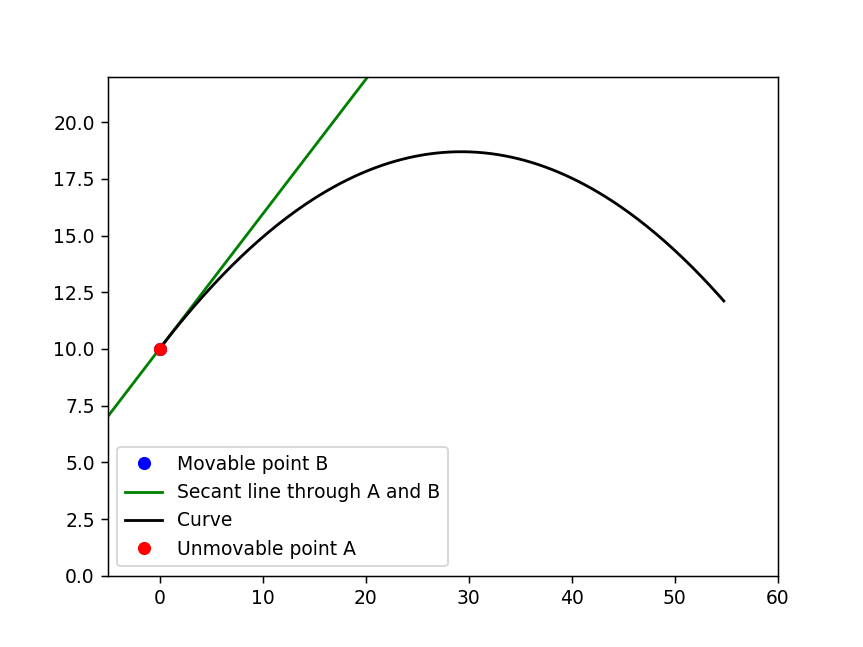

In [36]:
from sympy import *

fig3 = plt.figure(); # создание графического окна для анимации
ax3 = plt.axes();    # создание графической области для анимации

s = np.transpose(np.array([s_x, s_y]))
A = np.array([s[0,0], s[0,1]]); 
# отображение объекта "точка", координаты пока не определены
point_B, = ax3.plot([], [],'bo') 
# отображение объекта "сек. прямая", координаты пока не определены
secant_line, = ax3.plot([], [],'g' )

def init():
    """Создает начальное состояние графической области перед началом анимации
    
    Returns: два графических объета, которые в последствии будут изменяться
    """
    curve, = ax3.plot(s[:,0], s[:,1],'k'); # траектория движения
    point_A, = ax3.plot(A[0],A[1],'ro'); # неподвижная точка
    
    B = np.array([s[-1,0], s[-1,1]]);    
    point_B.set_data(B[0],B[1]); # подвижная точка
    
    secant_p = [A + (B - A)*t for t in [-2, 2]]; # векторно-параметрическое уравнение прямой 
    secant_p = np.array(secant_p)
    secant_line.set_data(secant_p[:,0], secant_p[:,1]); # секущая прямая
    
    plt.legend(['Мovable point B','Secant line through A and B','Curve','Unmovable point A'])
    plt.axis([-5, s_end+5, 0, h_end+10]);
    return point_B, secant_line,

def find_k(t): 
    """Находит угловой коэффициент k
    
    Arguments:
    t -- параметр, определяющий координаты точки в соответсвие с функцией,
    задданой параметрически
    
    Returns: значение углового коэффициента k
    """
    t1 = Symbol('t1') # используем параметр t1 для вычисления необходимых производных
    
    # вычисление производных и подстановка t
    x_der = diff(v0_x*t1, t1, 1) 
    y_der = diff((h_start + v0_y*t1 - g*t1**2/2), t1, 1).subs(t1, t)
    
    # так как y_der/x_der будет иметь тип sympy.core.numbers.Float, 
    # результат необходимо преобразовать в тип float для дальнейших вычислений
    k = float(y_der/x_der)
    return  k

def at_frame3(t):
    """Задает графичекий объект point_B точкой с координатами (t[0],t[1]) и
    изменяет массив точек прямой для графического объекта secant_p в соответствии с
    последней координатой точки B. 
    При совпадении координат точек A, B, происходит замена
    точки B, на точку, принадлежащую касательной к точке A
    
    Arguments:
    t -- массив из двух элементов
    
    Returns: два графических объекта point_B и secant_line
    """
    point_B.set_data(t)
    B = np.array(t) # координаты точки B
    
    if np.array_equal(A, B): # проверка на совпадение координат
        k = find_k(0) # угловой коэффициент
        x_coord = 10 # произвольная координата по x новой точки
        # нахождение y координаты в соответсвтии ур-ю касательной
        y_coord = k*(x_coord - A[0]) + A[1] 
        B = np.array([x_coord, y_coord])
        
    secant_p = [A + (B - A)*50*k for k in [-2, 2]]; 
    secant_p = np.array(secant_p)
    secant_line.set_data(secant_p[:,0], secant_p[:,1]);
    return point_B, secant_line,

anim.FuncAnimation(fig3, at_frame3, frames=s[::-1], init_func=init, repeat=False, interval=10)
